In [1]:
import os, warnings, matplotlib
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
from konlpy.tag import Okt

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

font_location = 'C:/Windows/Fonts/HYCYSM.TTF'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family=font_name)

In [2]:
url = 'UseData/Voucher/Cleaned'
os.listdir(url)

['네이버쇼핑_(단호박_다이어트식품)_cleaned.csv',
 '네이버쇼핑_(단호박_샐러드)_cleaned.csv',
 '네이버쇼핑_(단호박칩_반려동물)_cleaned.csv',
 '스마트스토어_(구운_단호박)_cleaned.csv',
 '스마트스토어_(다이어트_스낵)_cleaned.csv',
 '스마트스토어_(호박_스낵)_cleaned.csv']

In [3]:
filesDF = pd.DataFrame({'File' : os.listdir(url), 'Type' : ['ns', 'ns', 'ns', 'nsst', 'nsst', 'nsst']})
filesDF

,File,Type
0,네이버쇼핑_(단호박_다이어트식품)_cleaned.csv,ns
1,네이버쇼핑_(단호박_샐러드)_cleaned.csv,ns
2,네이버쇼핑_(단호박칩_반려동물)_cleaned.csv,ns
3,스마트스토어_(구운_단호박)_cleaned.csv,nsst
4,스마트스토어_(다이어트_스낵)_cleaned.csv,nsst
5,스마트스토어_(호박_스낵)_cleaned.csv,nsst


    만들어야 할 함수?
    1. 그래프 생성함수 (긍/부정 빈도수, 별점 빈도수)
        -> 이걸 따로따로 만드는게 나을라나
    2. 긍/부정 별 키워드 csv파일 생성 함수

In [206]:
def graphMaker(url, Type, file):
    df = pd.read_csv(url + file, index_col=0) # 파일 1개씩 읽어와서
    parameters = {'axes.labelsize' : 25, 'axes.titlesize': 25, 
                  'xtick.labelsize':17, 'ytick.labelsize':17}
    colormap = ['#549be3', '#8272c1', '#994689', '#941a47', '#730703']
    # 쇼핑 csv 파일
    if Type == 'ns':
        # pie chart
        fig = plt.figure(figsize=(20,10))
        plt.rcParams.update(parameters) # 제목 및 눈금 크기 조정
        # plt.ylabel(fontsize=15)
        # plt.subplots_adjust(wspace=0.5)
        plt.subplot(121)
        pieChart = df['별점'].value_counts().plot.pie(startangle=300, 
                                                     explode=(0, 0.2, 0.3, 0.5, 0.7),
                                                     autopct='%1.1f%%',
                                                     shadow=True,
                                                     colors=colormap,
                                                     fontsize=20)
        plt.title('별점 별 비율(Pie)')
        
        # bar chart
        plt.subplot(122)
        barChart = df['별점'].value_counts().plot.bar(color=colormap)
        for index, data in enumerate(df['별점'].value_counts()):
            plt.text(x=index, y=data, s=f'{data}', fontdict=dict(fontsize=20), ha='center')
        plt.xticks(rotation=0)
        plt.xlabel('별점')
        plt.title('별점 별 빈도수(Bar)')
        
        # plt.show()
        fig.savefig(url + '/' + file[:-4] + '_별점차트.jpg', dpi=100)
        
    # 스마트스토어 csv파일
    elif Type == 'nsst':
        # pie chart
        fig = plt.figure(figsize=(20,10))
        plt.rcParams.update(parameters) # 제목 및 눈금 크기 조정
        # plt.ylabel(fontsize=15)
        # plt.subplots_adjust(wspace=0.5)
        plt.subplot(121)
        pieChart = df['별점'].value_counts().plot.pie(startangle=300, 
                                                     explode=(0, 0.2, 0.3, 0.5, 0.7),
                                                     autopct='%1.1f%%',
                                                     shadow=True,
                                                     colors=colormap,
                                                     fontsize=20)
        plt.title('별점 별 비율(Pie)')
        
        # bar chart
        plt.subplot(122)
        barChart = df['별점'].value_counts().plot.bar(color=colormap)
        for index, data in enumerate(df['별점'].value_counts()):
            plt.text(x=index, y=data, s=f'{data}', fontdict=dict(fontsize=20), ha='center')
        plt.xticks(rotation=0)
        plt.xlabel('별점')
        plt.title('별점 별 빈도수(Bar)')
        
        # plt.show()
        fig.savefig(url + '/' + file[:-4] + '_별점차트.jpg', dpi=100)
    

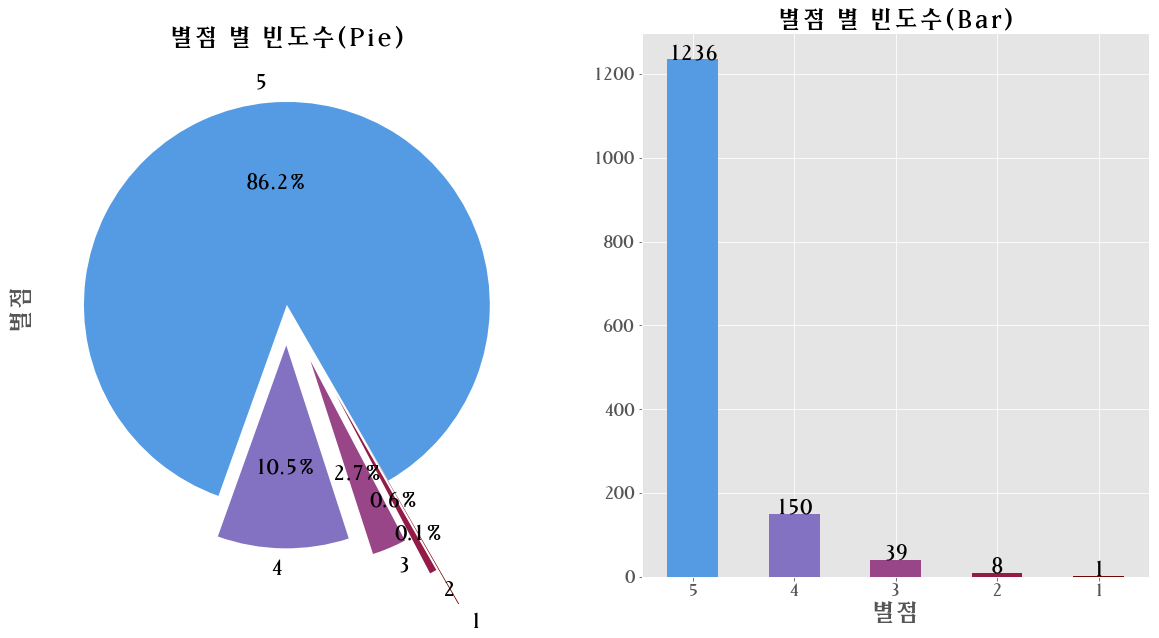

In [193]:
file = '/' + filesDF['File'][0]
Type = filesDF['Type'][0]
graphMaker(url, Type, file)

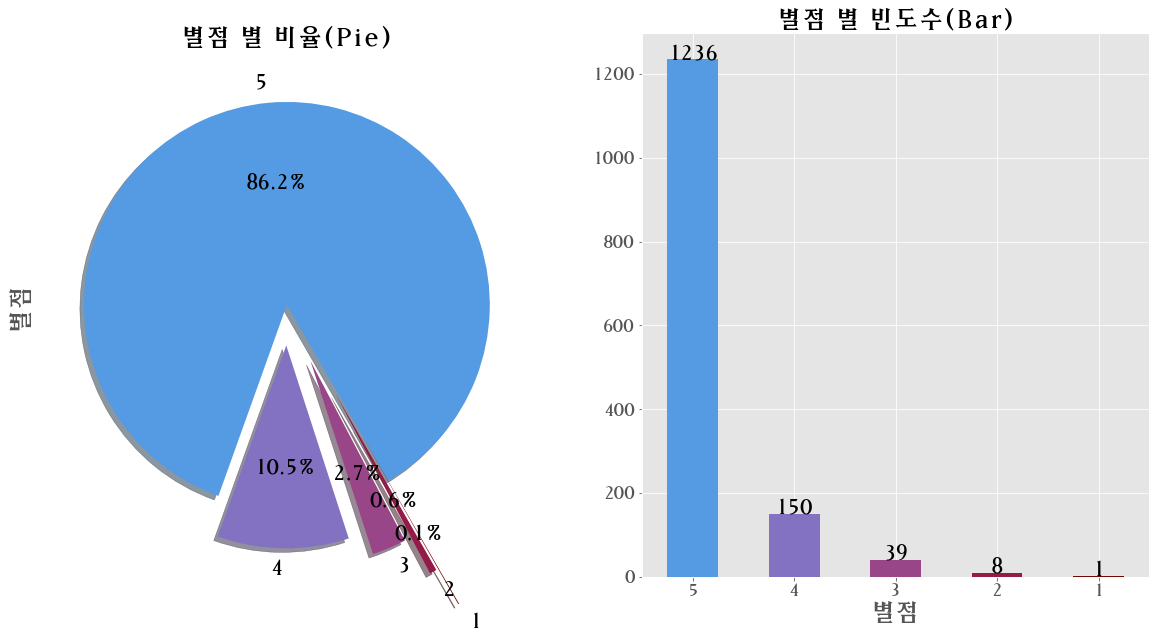

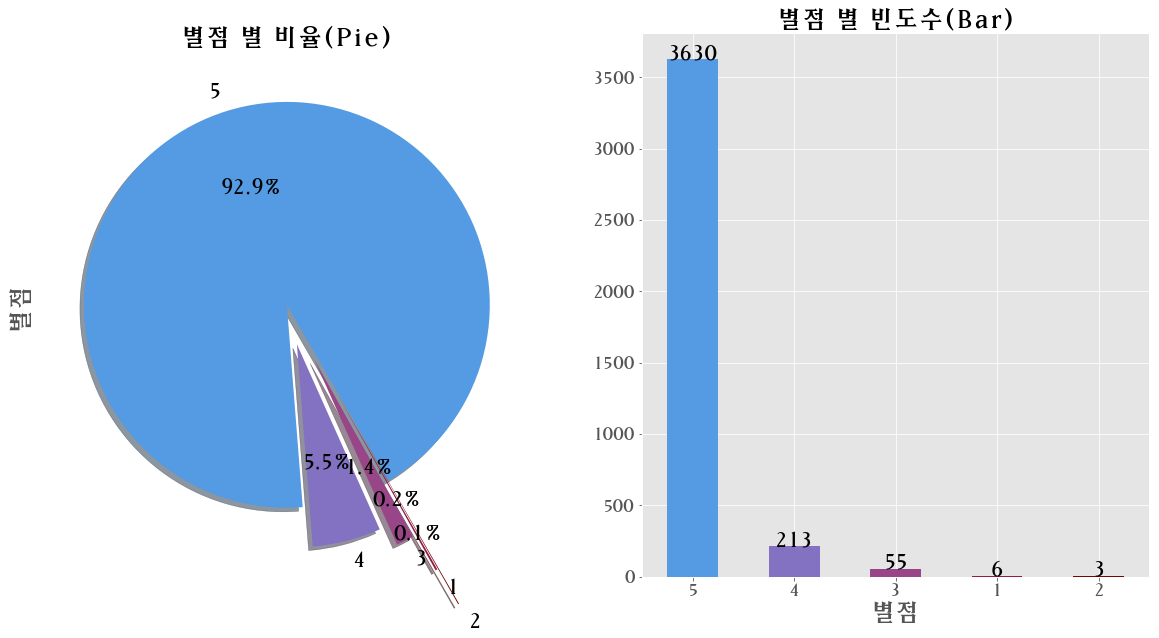

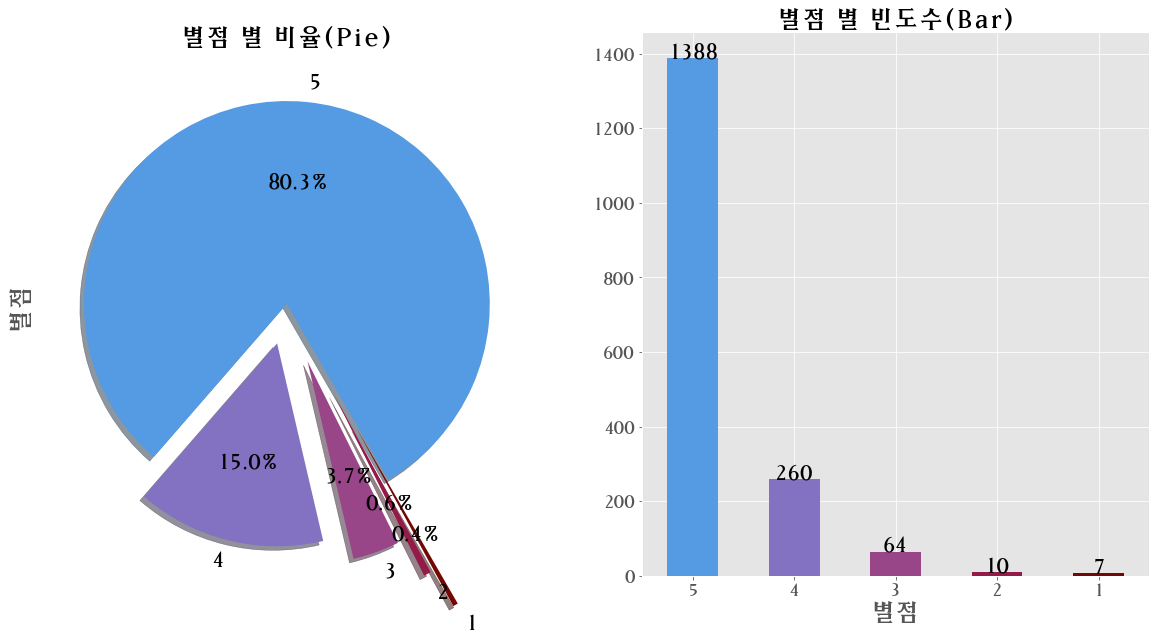

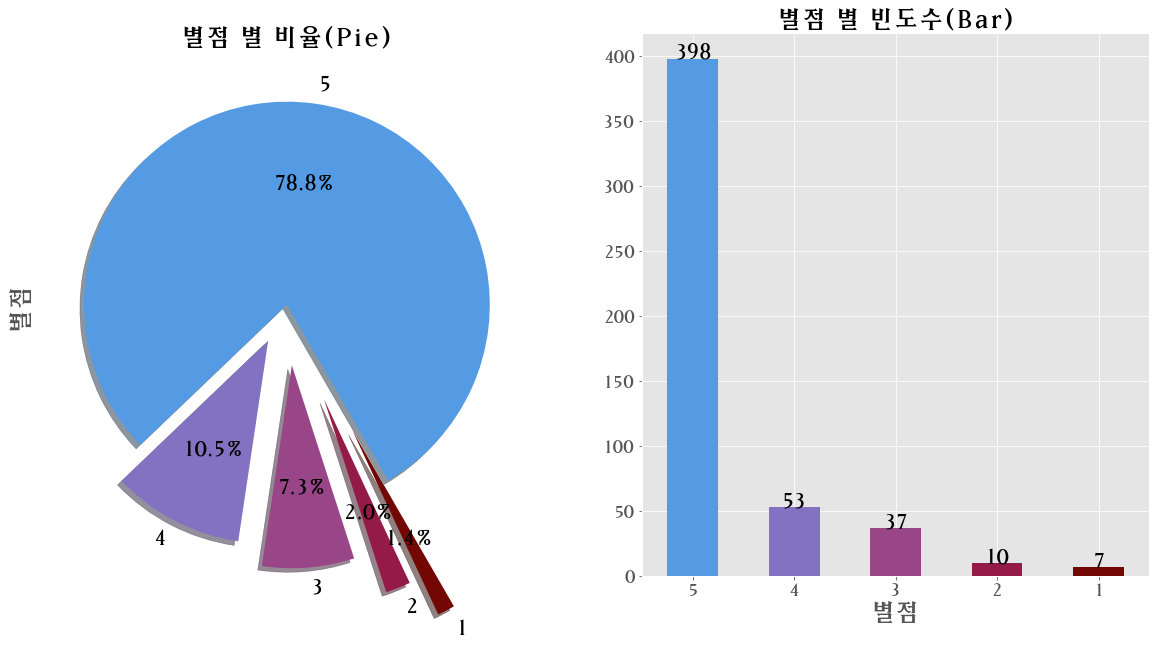

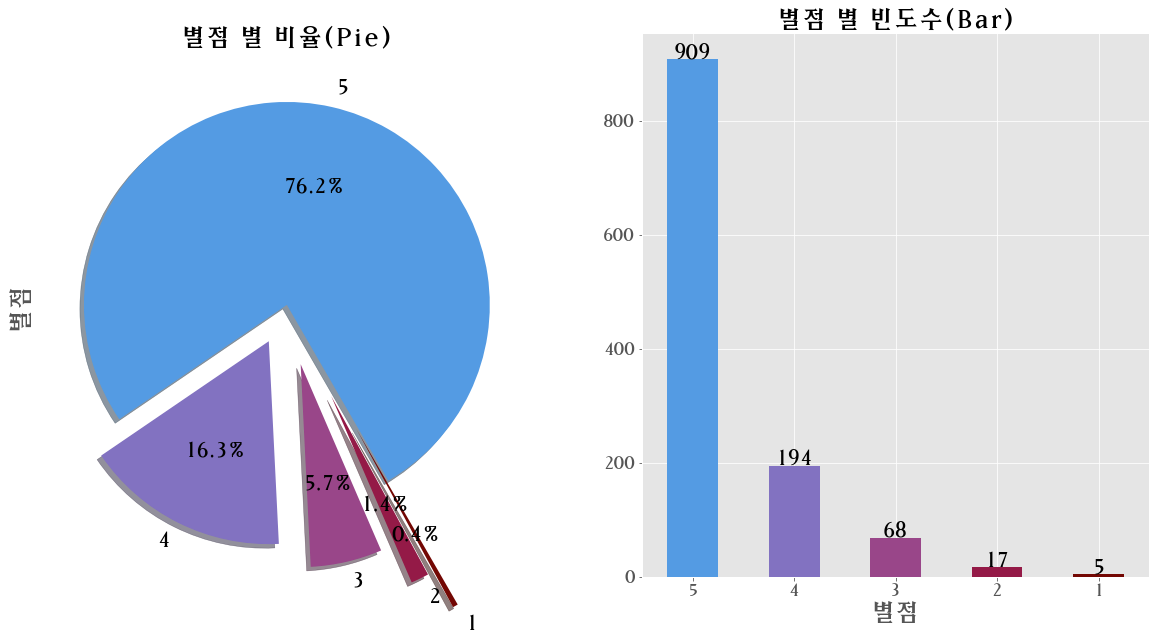

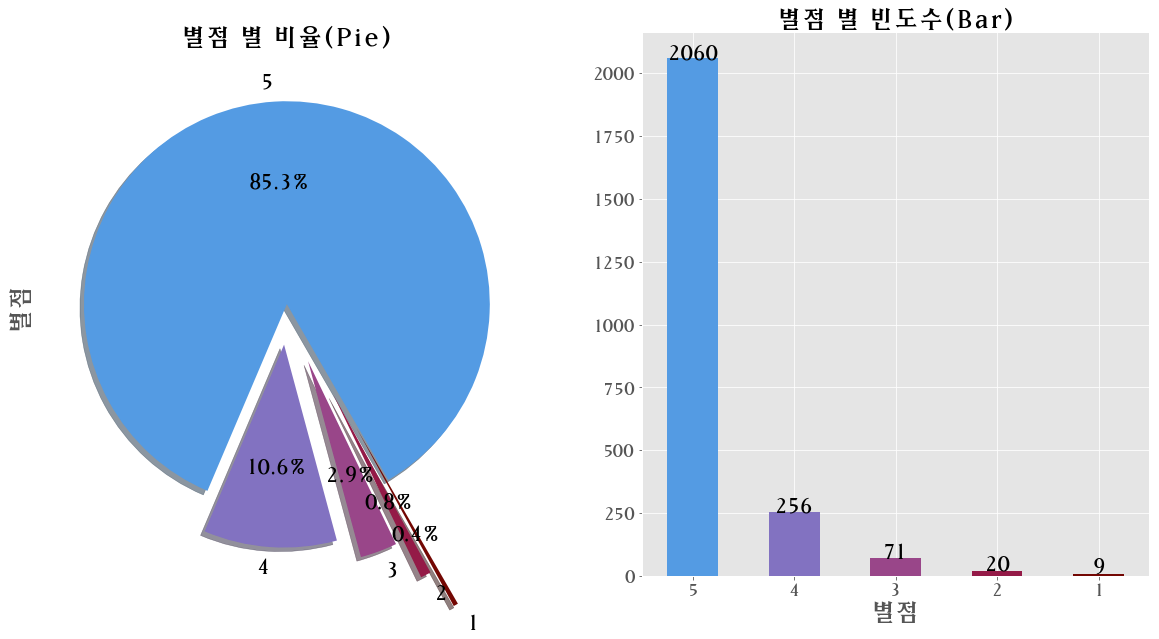

In [207]:
for index in range(len(filesDF)):
    file = '/' + filesDF['File'][index]
    Type = filesDF['Type'][index]
    graphMaker(url, Type, file)

    별점 별 그래프 생성함수는 오케이.
    긍/부정 그래프 생성함수 그리자.

In [208]:
def graphMaker_posneg(url, Type, file):
    df = pd.read_csv(url + file, index_col=0) # 파일 1개씩 읽어와서
    parameters = {'axes.labelsize' : 25, 'axes.titlesize': 25, 
                  'xtick.labelsize':17, 'ytick.labelsize':17}
    # 쇼핑 csv 파일
    if Type == 'ns':
        # pie chart
        fig = plt.figure(figsize=(20,10))
        plt.rcParams.update(parameters) # 제목 및 눈금 크기 조정
        # plt.ylabel(fontsize=15)
        # plt.subplots_adjust(wspace=0.5)
        plt.subplot(121)
        pieChart = df['긍부정'].value_counts().plot.pie(startangle=320, 
                                                     explode=(0, 0.6),
                                                     autopct='%1.1f%%',
                                                     shadow=True,
                                                     colors=['#66b3ff', '#ff9999'],
                                                     fontsize=20)
        plt.title('긍/부정 비율(Pie)')
        
        # bar chart
        plt.subplot(122)
        barChart = df['긍부정'].value_counts().plot.bar(color=['#66b3ff', '#ff9999'])
        for index, data in enumerate(df['긍부정'].value_counts()):
            plt.text(x=index, y=data, s=f'{data}', fontdict=dict(fontsize=20), ha='center')
        plt.xticks(rotation=0)
        # plt.xlabel('긍/부정 (긍정:1, 부정:0)')
        plt.title('긍/부정 빈도수(Bar)')
        fig.text(0.5, 0.04, '긍/부정 (긍정:1, 부정:0)', ha='center', fontsize=30)
        # fig.supxlabel('긍/부정 (긍정:1, 부정:0)') # 이거 버전업그레이드...
        
        # plt.show()
        fig.savefig(url + '/' + file[:-4] + '_긍부정차트.jpg', dpi=100)
        
    # 스마트스토어 csv파일
    elif Type == 'nsst':
        # pie chart
        fig = plt.figure(figsize=(20,10))
        plt.rcParams.update(parameters) # 제목 및 눈금 크기 조정
        # plt.ylabel(fontsize=15)
        # plt.subplots_adjust(wspace=0.5)
        plt.subplot(121)
        pieChart = df['긍부정'].value_counts().plot.pie(startangle=320, 
                                                     explode=(0, 0.6),
                                                     autopct='%1.1f%%',
                                                     shadow=True,
                                                     colors=['#66b3ff', '#ff9999'],
                                                     fontsize=20)
        plt.title('긍/부정 비율(Pie)')
        
        # bar chart
        plt.subplot(122)
        barChart = df['긍부정'].value_counts().plot.bar(color=['#66b3ff', '#ff9999'])
        for index, data in enumerate(df['긍부정'].value_counts()):
            plt.text(x=index, y=data, s=f'{data}', fontdict=dict(fontsize=20), ha='center')
        plt.xticks(rotation=0)
        # plt.xlabel('긍/부정 (긍정:1, 부정:0)')
        plt.title('긍/부정 빈도수(Bar)')
        fig.text(0.5, 0.04, '긍/부정 (긍정:1, 부정:0)', ha='center', fontsize=30)
        # fig.supxlabel('긍/부정 (긍정:1, 부정:0)')
        
        # plt.show()
        fig.savefig(url + '/' + file[:-4] + '_긍부정차트.jpg', dpi=100)

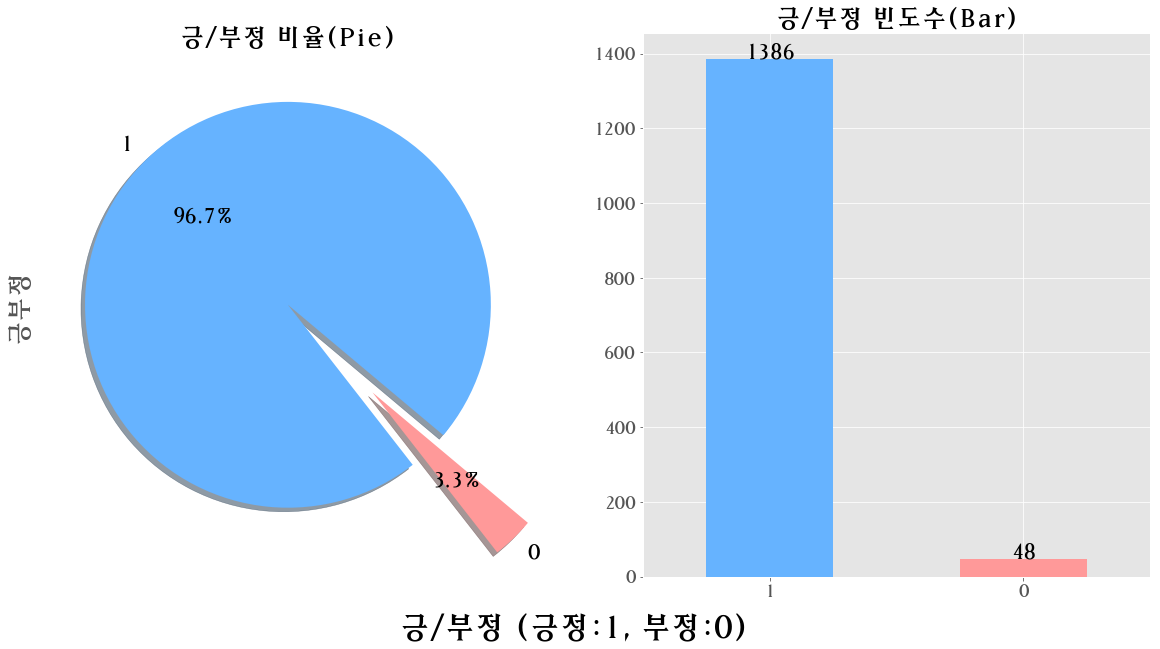

In [209]:
file = '/' + filesDF['File'][0]
Type = filesDF['Type'][0]
graphMaker_posneg(url, Type, file)

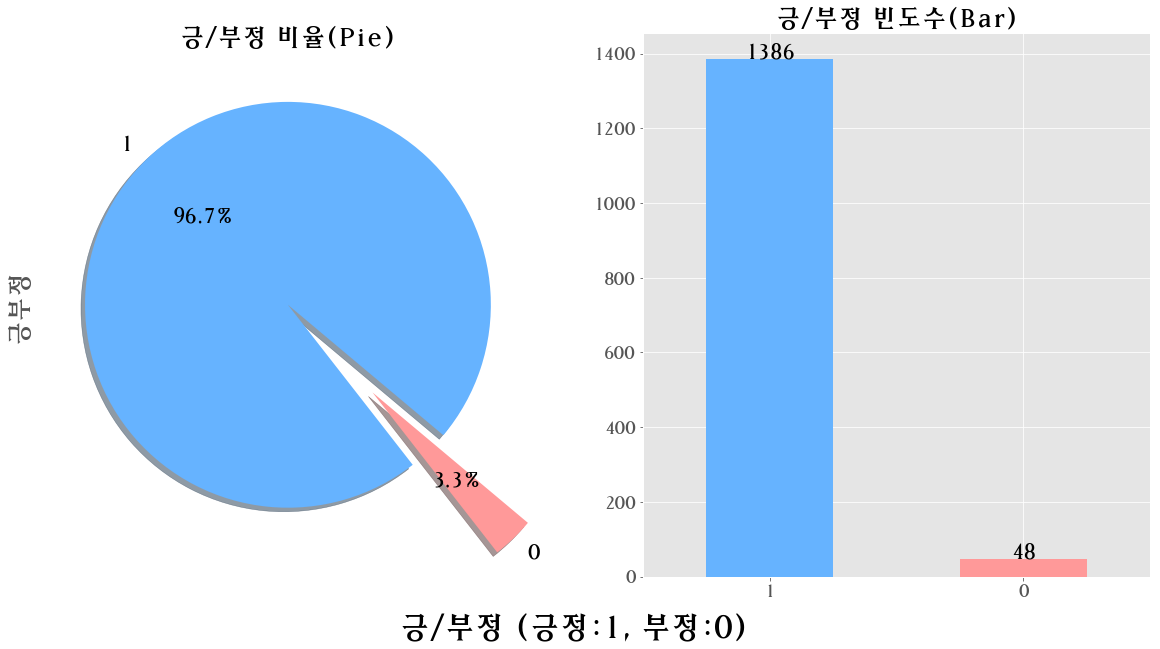

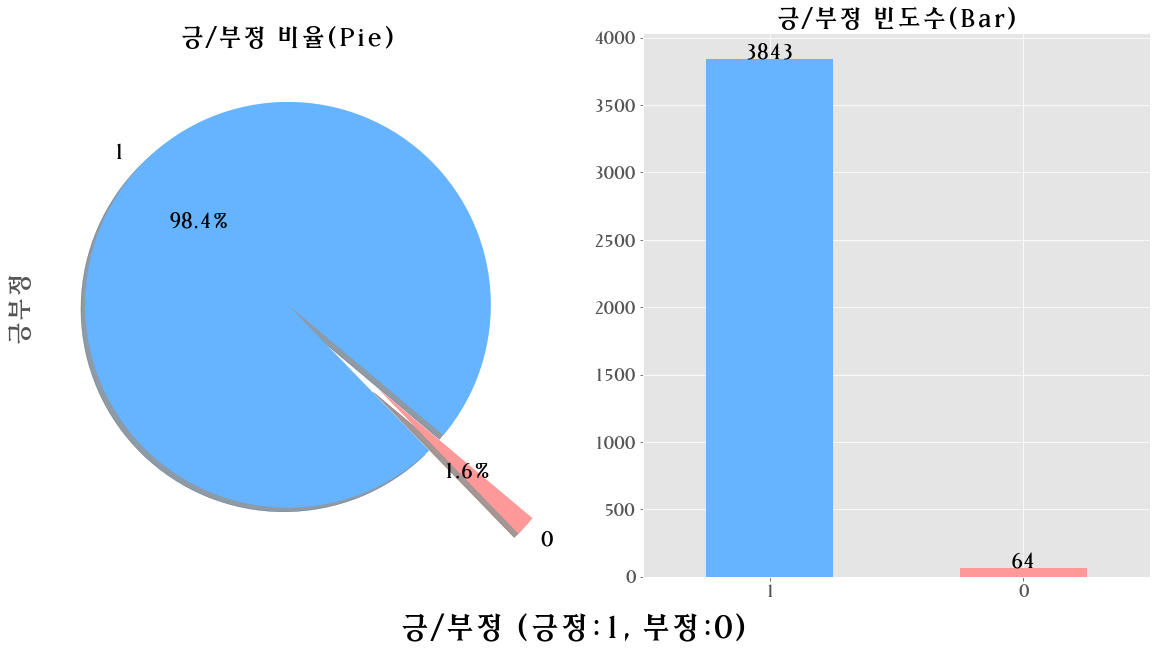

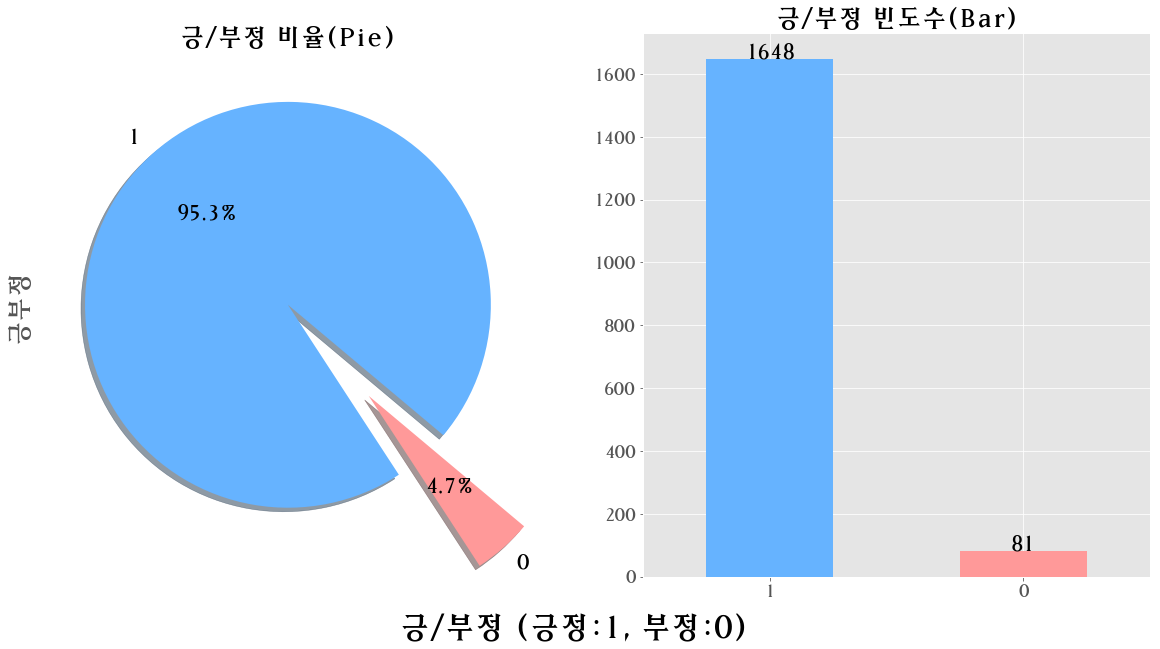

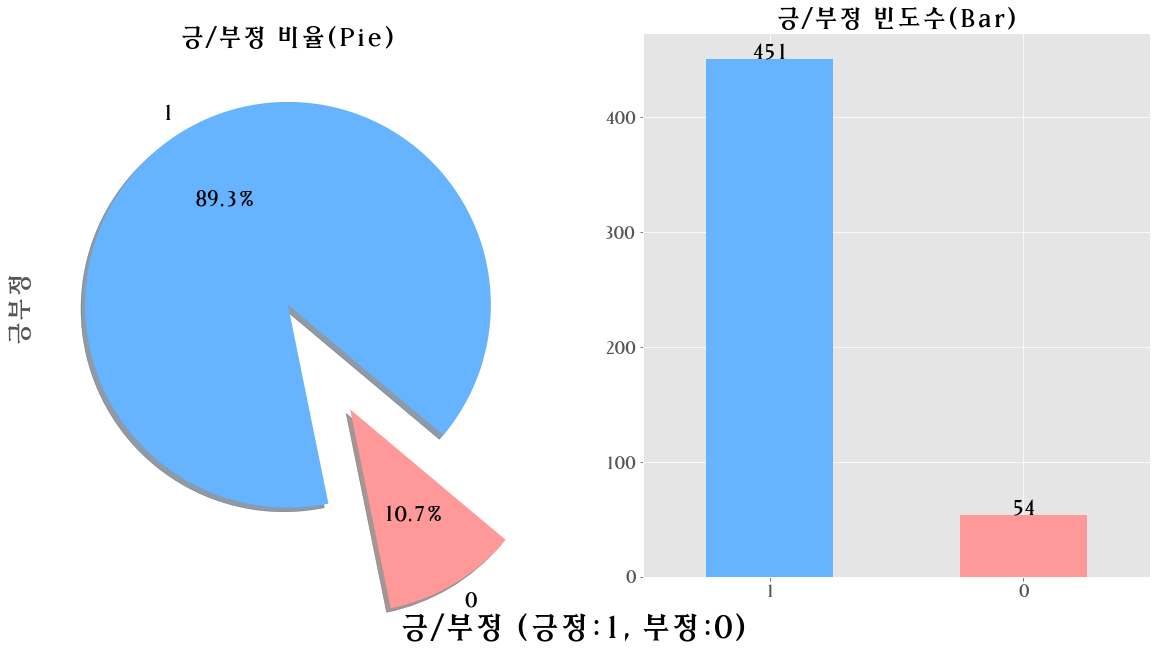

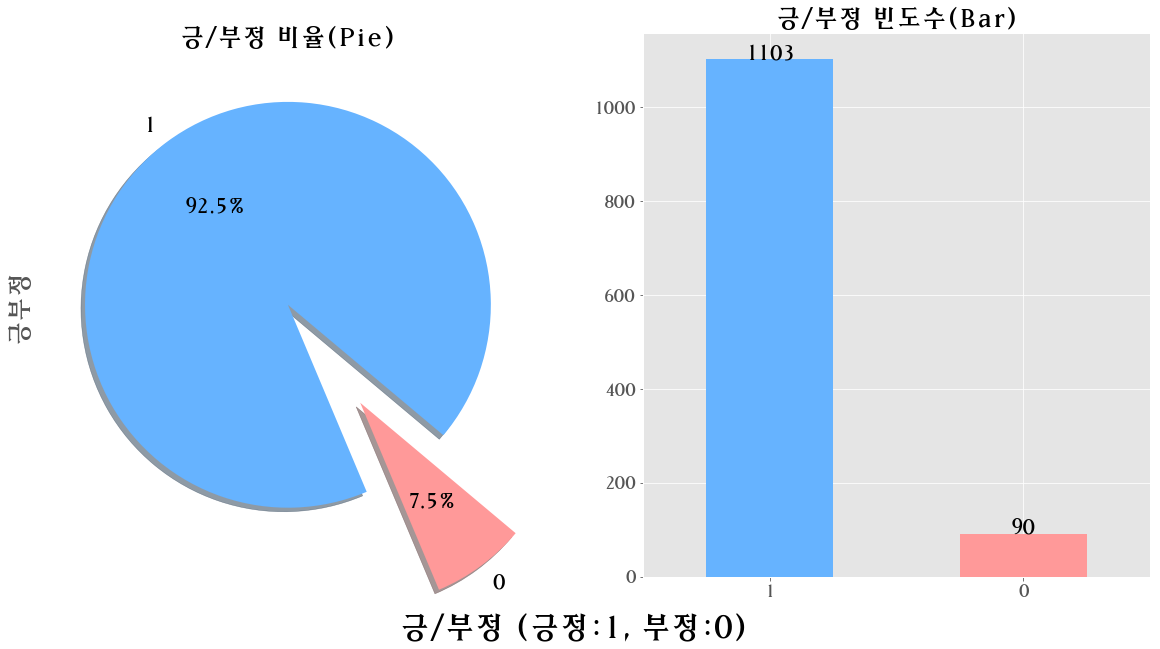

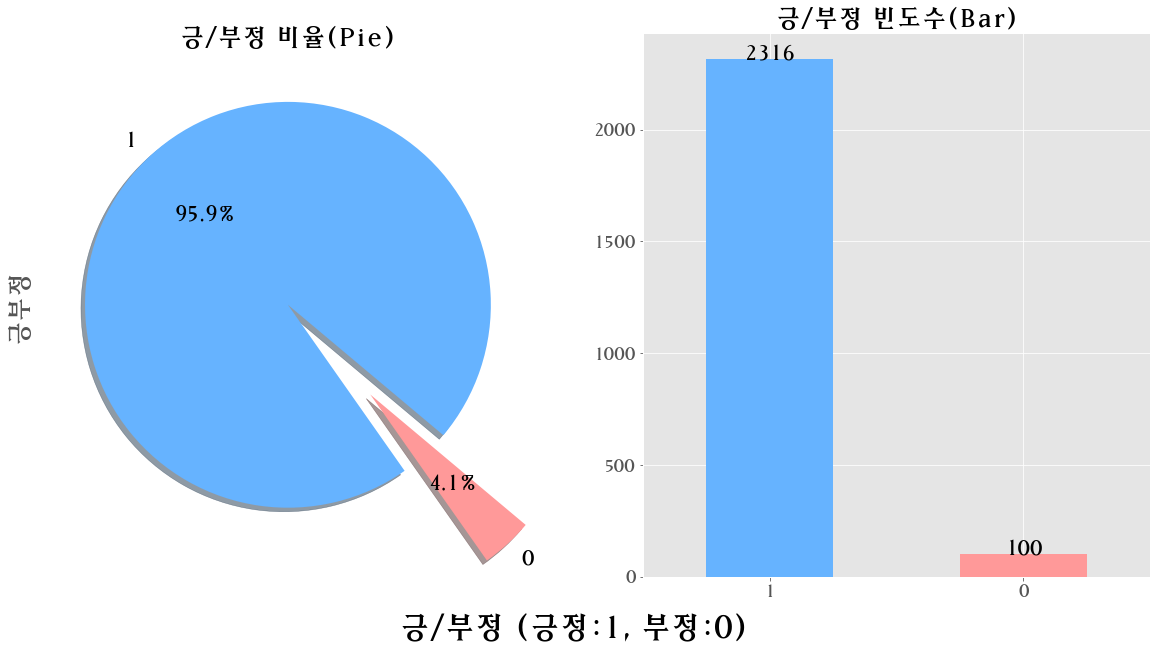

In [210]:
for index in range(len(filesDF)):
    file = '/' + filesDF['File'][index]
    Type = filesDF['Type'][index]
    graphMaker_posneg(url, Type, file)